In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Doublet Kalpha1 et 2 du cuivre

Reference:  

    Härtwig, J., G. Hölzer, J. Wolf, et E. Förster.
    Remeasurement of the profile of the characteristic Cu K α
    emission line with high precision and accuracy ».
    Journal of Applied Crystallography 26,
    nᵒ 4 (1 août 1993): 539‑48.
    
https://doi.org/10.1107/S0021889893000160


In [2]:
from scipy.constants import elementary_charge, Planck, speed_of_light
eV_to_m = Planck * speed_of_light / elementary_charge

In [3]:
coeffs_doublet = {'Kalpha1_1':(8047.838, 2.26, 0.956), # E(eV), FWHM(eV), I/I0
                  'Kalpha1_2':(8045.401, 3.38, 0.092),
                  'Kalpha2_1':(8028.022, 2.71, 0.330),
                  'Kalpha2_2':(8026.467, 3.44, 0.113)}

In [4]:
def Lorentzian(x, x0, FWHM):
    x = np.asarray(x)
    gamma = FWHM/2
    return gamma**2/((x-x0)**2 + gamma**2) / np.pi / gamma

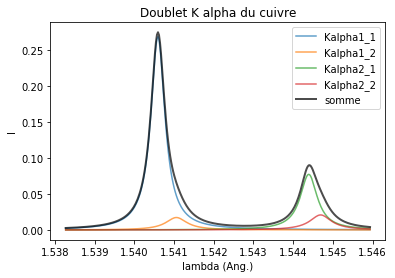

In [32]:
# Graph
E_span = np.linspace(8020, 8060, 300)

Kalpha_doublet = np.zeros_like(E_span)
for name, (E, FWHM, I) in coeffs_doublet.items():
    single_peak = I*Lorentzian(E_span, E, FWHM)
    Kalpha_doublet += single_peak
    plt.plot(eV_to_m/E_span *1e10, single_peak,
            label=name, alpha=0.7)
    
plt.plot(eV_to_m/E_span *1e10, Kalpha_doublet,
         linewidth=2, color='k', alpha=0.7, label='somme');
plt.xlabel('lambda (Ang.)'); plt.ylabel('I');
plt.title('Doublet K alpha du cuivre'); plt.legend();

In [23]:
from scipy.stats import cauchy
from scipy.interpolate import interp1d

In [12]:
cauchy.isf(0, 1, 1)

inf

In [17]:
N = 100
X = np.random.rand(N)
c1 = cauchy.isf(X, 1, 1)

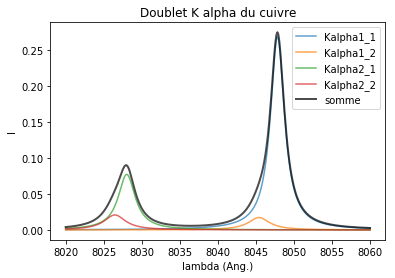

In [35]:
# Graph
E_span = np.linspace(8020, 8060, 300)

Kalpha_doublet = np.zeros_like(E_span)
for name, (E, FWHM, I) in coeffs_doublet.items():
    single_peak = I*cauchy.pdf(E_span, loc=E, scale=FWHM/2)
    Kalpha_doublet += single_peak
    plt.plot(E_span, single_peak,  # eV_to_m/E_span *1e10
            label=name, alpha=0.7)
    

plt.plot(E_span, Kalpha_doublet,
         linewidth=2, color='k', alpha=0.7, label='somme');
plt.xlabel('lambda (Ang.)'); plt.ylabel('I');
plt.title('Doublet K alpha du cuivre'); plt.legend();

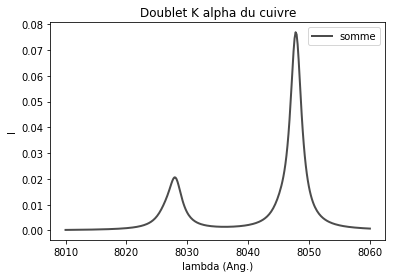

In [27]:
plt.plot(E_span, Kalpha_doublet,
         linewidth=2, color='k', alpha=0.7, label='somme');
plt.xlabel('lambda (Ang.)'); plt.ylabel('I');
plt.title('Doublet K alpha du cuivre'); plt.legend();